# MNIST

The MNIST dataset contains 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. MNIST is often called the "Hello World" of Machine Learning.

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following fetches the MNIST dataset:

## Import

In [118]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

### Structure

Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
* A `DESCR` key describing the dataset
* A `data` key containing an array with one row per instance and one column per feature
* A `target` key containing an array with the labels


In [119]:
X, y = mnist["data"], mnist["target"]
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X.shape: (70000, 784)
y.shape: (70000,)


### Display

There are 70,000 images, and each iamge has 784 features. This is because each image is $28\times28$ pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black). Let's take a peek at one digit from the dataset. All you need to do is grab an instance's feature vector, reshape it to a $28\times28$ array, and display it using Matplotlib's `imshow()` function.

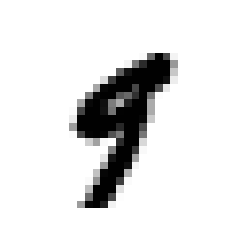

In [120]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000:36001].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [121]:
y[36000]

'9'

## Creating a Test Set

MNIST is actually already split into training and test set. The first 60,000 images are the training set, and the last 10,000 images are the test set.


In [122]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [123]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
print(X_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 358.9 MB
None


In [125]:
print('*******************************************')
print(y_train)
print('*******************************************')
print()
print('*******************************************')
print(y_test)
print('*******************************************')

*******************************************
0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: int32
*******************************************

*******************************************
60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 10000, dtype: int32
*******************************************


### Shuffling

Let's also shuffle the training set, guaranteeing that all cross-validation folds will be similar (you don't want one fold to be missing some digits). Also, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won't happen.

In [126]:
import numpy as np
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

Let's simplify for now and only try to identify one digit--for example the number 9.

The "9-dector" is an example of a *binary classifier*, capable of distinguishing between just two classes, 9 and not-9. Let's create the target vectors for this classification task.

In [127]:
y_train == 1

12628    False
37730    False
39991    False
8525     False
8279     False
         ...  
54343    False
38158    False
860      False
15795    False
56422    False
Name: class, Length: 60000, dtype: bool

In [128]:
y_train_9 = (y_train == 9) # True for all 9s, False for all other digits
y_test_9 = (y_test == 9)

In [129]:
type(y_train_9)

pandas.core.series.Series

In [130]:
# https://stackoverflow.com/questions/52173161/getting-a-list-of-indices-where-pandas-boolean-series-is-true
import pandas as pd
s = pd.Series([True, False, True, True, False, False, False, True])
s[s].index

Int64Index([0, 2, 3, 7], dtype='int64')

In [131]:
y_train_9[y_train_9].index

Int64Index([ 8525, 51012, 26064, 25224, 19269, 21377, 52203,  3867,  8440,
            34482,
            ...
            24538, 24300, 19457,  1585, 40994, 43001, 14502, 31551, 53810,
            41434],
           dtype='int64', length=5949)

## Stochastic Gradient Descent (SGD)

A good place to start is with a *Stochastic Gradient Descent (SGD)* using Scikit-Learn's `SGDClassifier` class. The classifier has the advantage of being capable of handling very large datasets efficiently. This is, in part, because SGD deals with training instances independently, one at a time, which also makes SGD well suited for *online learning*. Let's create an `SGDClassifier` and train it on the whole training set.

In [132]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(random_state=42)

### Random State

The `SGDClassifier` relies on randomness during training (hence the name "stochastic"). If you want reproducible results you should set the `random_state` parameter.
Now, this can be used to detect images of the number 9.

In [133]:
some_digit

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [134]:
sgd_clf.predict(some_digit)

array([False])